In [1]:
import uproot
import matplotlib.pyplot as plt
import awkward as ak
import vector

In [3]:
file_names  =["../ffNtuple_2Mu2E_100_1p2_48.root","../ffNtuple_2Mu2E_800_1p2_6.root","../ffNtuple_2Mu2E_500_1p2_9p6.root"]
branches_dict = {}
for file_name in file_names:
    print("Opening ",file_name)
    temp_file = uproot.open(file_name)
    tree = temp_file['ffNtuplizer/ffNtuple']
    branches_dict[file_name] = tree.arrays()

Opening  ../ffNtuple_2Mu2E_100_1p2_48.root
Opening  ../ffNtuple_2Mu2E_800_1p2_6.root
Opening  ../ffNtuple_2Mu2E_500_1p2_9p6.root


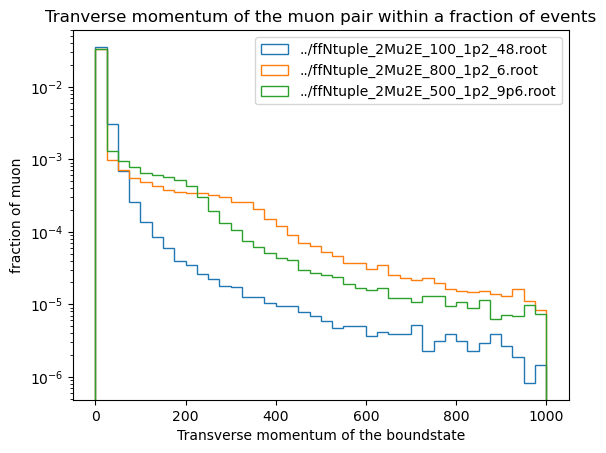

In [4]:
for file_name in file_names:
    branches = branches_dict[file_name]
    muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                          "py": branches['muon_p4.fCoordinates.fY'],
                          "pz": branches['muon_p4.fCoordinates.fZ'],
                          "t": branches['muon_p4.fCoordinates.fT']}  )
    plt.hist(ak.flatten(muon_p4.pt), bins=40, range=(0, 1000),histtype='step', label = file_name, density=True)
plt.title('Tranverse momentum of the muon pair within a fraction of events')
plt.xlabel('Transverse momentum of the boundstate')
plt.ylabel('fraction of muon')
plt.legend()
plt.yscale('log')


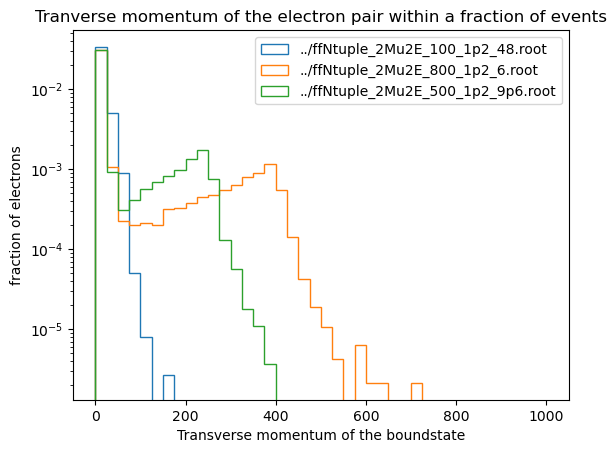

In [6]:
for file_name in file_names:
    branches = branches_dict[file_name]
    electron_p4 = vector.zip({"px": branches['electron_p4.fCoordinates.fX'],
                              "py": branches['electron_p4.fCoordinates.fY'],
                              "pz": branches['electron_p4.fCoordinates.fZ'],
                              "t": branches['electron_p4.fCoordinates.fT']}  )
    plt.hist(ak.flatten(electron_p4.pt), bins=40, range=(0, 1000),histtype='step', label = file_name, density=True)
plt.title('Tranverse momentum of the electron pair within a fraction of events')
plt.xlabel('Transverse momentum of the boundstate') 
plt.ylabel('fraction of electrons')
plt.legend()
plt.yscale('log')